In [2]:
#### Loading the packages to be used
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import print_function  # Python 2 and 3
#from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
# show all output and more columns and rows
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 410
pd.options.display.max_rows = 2000

# convert date to numeric
pd.to_numeric(drugDF.STARTMARKETINGDATE)

# convert unit price to log unit price
drugDF['log_price']=np.log(drugDF.NADAC_Per_Unit)

In [33]:
drug= pd.read_csv('drug.csv')
drug.head(1)

,PRODUCTID,PRODUCTNDC,NDCPACKAGECODE,PACKAGEDESCRIPTION,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE,NDC10,NDC Description,NDC11,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date,logprice,price
0,0009-3073_0f1820e6-28cb-4dd7-89ee-00583ebab35d,Sep-73,0009-3073-01,"1 VIAL, SINGLE-DOSE in 1 PACKAGE (0009-3073-01...",HUMAN PRESCRIPTION DRUG,Depo-Medrol,NaN,methylprednisolone acetate,"INJECTION, SUSPENSION",INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR;...,19590528.0,NaN,NDA,NDA011757,Pharmacia and Upjohn Company LLC,METHYLPREDNISOLONE ACETATE,40,mg/mL,"Corticosteroid [EPC],Corticosteroid Hormone Re...",NaN,9307301,ZOLPIDEM TARTRATE 5 MG TABLET,93007301,0.02878,05/17/2017,EA,C/I,N,1,G,NaN,NaN,06/07/2017,-3.548075,0.02878


#['DOSAGEFORMNAME'] + ['ROUTENAME'] + ['STARTMARKETINGDATE'] + ['MARKETINGCATEGORYNAME']+ ['LABELERNAME']  
#+ ['PHARM_CLASSES'] + ['DEASCHEDULE'] +['OTC']+['NADAC_Per_Unit']+['Classification_for_Rate_Setting']]

# select key features
keyfeatures=(['DOSAGEFORMNAME','ROUTENAME','LABELERNAME','STARTMARKETINGDATE','MARKETINGCATEGORYNAME',
            'PHARM_CLASSES','DEASCHEDULE','OTC','Classification_for_Rate_Setting','log_price'])

drugPrice = drugDF.loc[:,keyfeatures]


In [34]:
# only using columns from FDA
#['Explanation_Code']+['OTC']+['Classification_for_Rate_Setting']+
df=drug.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']]
df.shape
df.describe()

(13102, 8)

,STARTMARKETINGDATE,logprice
count,1.310200e+04,13102.000000
mean,2.009666e+07,-1.188063
std,7.176009e+04,2.003364
min,1.900011e+07,-6.630124
25%,2.007123e+07,-2.673069
50%,2.011122e+07,-1.492589
75%,2.014093e+07,0.024410
max,2.017053e+07,9.813613


In [35]:
# dummify categorical variables

def Dummify(column):
    column_values = pd.get_dummies(df[column], prefix=column, prefix_sep='__')
    return pd.concat([df.drop(column,axis=1),column_values],axis=1)

df = Dummify('DOSAGEFORMNAME')
df = Dummify('ROUTENAME')
df = Dummify('LABELERNAME')
df = Dummify('PHARM_CLASSES')
df = Dummify('DEASCHEDULE')
#drugPrice = Dummify('OTC')
#drugPrice = Dummify('Classification_for_Rate_Setting')
df = Dummify('MARKETINGCATEGORYNAME')

,STARTMARKETINGDATE,logprice,"DOSAGEFORMNAME__AEROSOL, FOAM","DOSAGEFORMNAME__AEROSOL, METERED","DOSAGEFORMNAME__AEROSOL, POWDER","DOSAGEFORMNAME__AEROSOL, SPRAY",DOSAGEFORMNAME__CAPSULE,"DOSAGEFORMNAME__CAPSULE, COATED PELLETS","DOSAGEFORMNAME__CAPSULE, COATED, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE","DOSAGEFORMNAME__CAPSULE, DELAYED RELEASE PELLETS","DOSAGEFORMNAME__CAPSULE, EXTENDED RELEASE","DOSAGEFORMNAME__CAPSULE, GELATIN COATED","DOSAGEFORMNAME__CAPSULE, LIQUID FILLED",DOSAGEFORMNAME__CONCENTRATE,DOSAGEFORMNAME__CREAM,"DOSAGEFORMNAME__CREAM, AUGMENTED",DOSAGEFORMNAME__ELIXIR,DOSAGEFORMNAME__EMULSION,DOSAGEFORMNAME__ENEMA,DOSAGEFORMNAME__FILM,"DOSAGEFORMNAME__FILM, EXTENDED RELEASE",DOSAGEFORMNAME__FOR SOLUTION,DOSAGEFORMNAME__FOR SUSPENSION,DOSAGEFORMNAME__GEL,"DOSAGEFORMNAME__GEL, DENTIFRICE",DOSAGEFORMNAME__GRANULE,"DOSAGEFORMNAME__GRANULE, FOR SOLUTION","DOSAGEFORMNAME__GRANULE, FOR SUSPENSION","DOSAGEFORMNAME__GUM, CHEWING",DOSAGEFORMNAME__INJECTION,"DOSAGEFORMNAME__INJECTION, POWDER, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, POWDER, LYOPHILIZED, FOR SOLUTION","DOSAGEFORMNAME__INJECTION, SOLUTION","DOSAGEFORMNAME__INJECTION, SUSPENSION","DOSAGEFORMNAME__INJECTION, SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__JELLY,DOSAGEFORMNAME__KIT,DOSAGEFORMNAME__LIQUID,DOSAGEFORMNAME__LOTION,DOSAGEFORMNAME__LOZENGE,DOSAGEFORMNAME__OIL,DOSAGEFORMNAME__OINTMENT,DOSAGEFORMNAME__PASTE,DOSAGEFORMNAME__PATCH,"DOSAGEFORMNAME__PATCH, EXTENDED RELEASE",DOSAGEFORMNAME__PELLET,DOSAGEFORMNAME__POWDER,"DOSAGEFORMNAME__POWDER, FOR SOLUTION","DOSAGEFORMNAME__POWDER, FOR SUSPENSION","DOSAGEFORMNAME__POWDER, METERED",DOSAGEFORMNAME__RINSE,DOSAGEFORMNAME__SHAMPOO,"DOSAGEFORMNAME__SHAMPOO, SUSPENSION",DOSAGEFORMNAME__SOLUTION,"DOSAGEFORMNAME__SOLUTION, CONCENTRATE","DOSAGEFORMNAME__SOLUTION, GEL FORMING / DROPS","DOSAGEFORMNAME__SOLUTION, GEL FORMING, EXTENDED RELEASE",DOSAGEFORMNAME__SOLUTION/ DROPS,DOSAGEFORMNAME__SPRAY,"DOSAGEFORMNAME__SPRAY, METERED",DOSAGEFORMNAME__SUPPOSITORY,DOSAGEFORMNAME__SUSPENSION,"DOSAGEFORMNAME__SUSPENSION, EXTENDED RELEASE",DOSAGEFORMNAME__SUSPENSION/ DROPS,DOSAGEFORMNAME__SWAB,DOSAGEFORMNAME__SYRUP,DOSAGEFORMNAME__TABLET,"DOSAGEFORMNAME__TABLET, CHEWABLE","DOSAGEFORMNAME__TABLET, COATED","DOSAGEFORMNAME__TABLET, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, EFFERVESCENT","DOSAGEFORMNAME__TABLET, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FILM COATED","DOSAGEFORMNAME__TABLET, FILM COATED, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, FOR SUSPENSION","DOSAGEFORMNAME__TABLET, MULTILAYER","DOSAGEFORMNAME__TABLET, MULTILAYER, EXTENDED RELEASE","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING","DOSAGEFORMNAME__TABLET, ORALLY DISINTEGRATING, DELAYED RELEASE","DOSAGEFORMNAME__TABLET, SUGAR COATED",DOSAGEFORMNAME__TINCTURE,ROUTENAME__AURICULAR (OTIC),ROUTENAME__BUCCAL,ROUTENAME__BUCCAL; SUBLINGUAL,ROUTENAME__CUTANEOUS,ROUTENAME__DENTAL,ROUTENAME__ENTERAL,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRATHECAL; INTRAVENOUS,ROUTENAME__INTRA-ARTERIAL; INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; INTRAVENOUS; SOFT TISSUE,ROUTENAME__INTRA-ARTICULAR; INTRALESIONAL; INTRAMUSCULAR; SOFT TISSUE,ROUTENAME__INTRADERMAL,ROUTENAME__INTRALESIONAL; INTRAMUSCULAR; INTRASYNOVIAL; SOFT TISSUE,ROUTENAME__INTRAMUSCULAR,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS,ROUTENAME__INTRAMUSCULAR; INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__INTRAMUSCULAR; SUBCUTANEOUS,ROUTENAME__INTRAOCULAR,ROUTENAME__INTRAVENOUS,ROUTENAME__INTRAVENOUS; SUBCUTANEOUS,ROUTENAME__NASAL,ROUTENAME__OPHTHALMIC,ROUTENAME__OPHTHALMIC; TOPICAL,ROUTENAME__ORAL,ROUTENAME__ORAL; ORAL,ROUTENAME__ORAL; RECTAL,ROUTENAME__ORAL; RESPIRATORY (INHALATION),ROUTENAME__ORAL; SUBLINGUAL,ROUTENAME__ORAL; TOPICAL,ROUTENAME__ORAL; TRANSMUCOSAL,ROUTENAME__PERINEURAL,ROUTENAME__RECTAL,ROUTENAME__RECTAL; TOPICAL,ROUTENAME__RESPIRATORY (INHALATION),ROUTENAME__SUBCUTANEOUS,ROUTENAME__SUBLINGUAL,ROUTENAME__TOPICAL,ROUTENAME__TRANSDERMAL,ROUTENAME__VAGINAL,MARKETING

In [37]:
df.shape

(13102, 1140)

In [38]:

y = df["logprice"]
x = df.loc[:, df.columns != 'logprice']

In [40]:
# test_size 0.1 is the best for linear regression, so we use 0.1 on random forest as well to get a comparison 
x_train,x_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.1)

#X.iloc[X_train] # return dataframe train
x_train.shape
x_test.shape

(11791, 1139)

(1311, 1139)

In [41]:
# to compare with linear model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
print("R^2 for train set: %f" %ols.score(x_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(x_test, y_test))

print("Root Mean Squared error: %.2f"
      % np.sqrt(((ols.predict(x_test) - y_test) ** 2).mean()))
        
# without log 
# Root Mean Squared error: 37.79

# with Log
# R^2 for train set: 0.801368
#--------------------------------------------------
#R^2 for test  set: 0.753213
# Root Mean Squared error: 1.00

R^2 for train set: 0.798941
--------------------------------------------------
R^2 for test  set: 0.745944
Root Mean Squared error: 0.98


In [45]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2 for train set: 0.798933
--------------------------------------------------
R^2 for test  set: -1209045743.842631


In [52]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2 for train set: 0.798933
--------------------------------------------------
R^2 for test  set: -1209045743.842631


In [63]:
# random forest regression
regressor = RandomForestRegressor(n_estimators= 100 , oob_score =True, random_state = 42)
#regressor.fit(x_train,y_train)
regressor.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [49]:
x_test.shape

(1311, 1139)

In [64]:
y_pred=regressor.predict(x)

In [59]:
y_pred=regressor.predict(x_test)

In [65]:
# compute error 

#from sklearn.metrics import mean_squared_error
#rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
errorScore=np.sqrt(((y_pred - y) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# error without log: 114.69
# error with log :0.68

Root Mean Squared error: 0.34


In [60]:
# compute error   big number may come from the sample erro

#from sklearn.metrics import mean_squared_error
#rms = np.sqrt(mean_squared_error(y_actual, y_predicted))
errorScore=np.sqrt(((y_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# error without log: 114.69
# error with log :0.68

Root Mean Squared error: 2.22


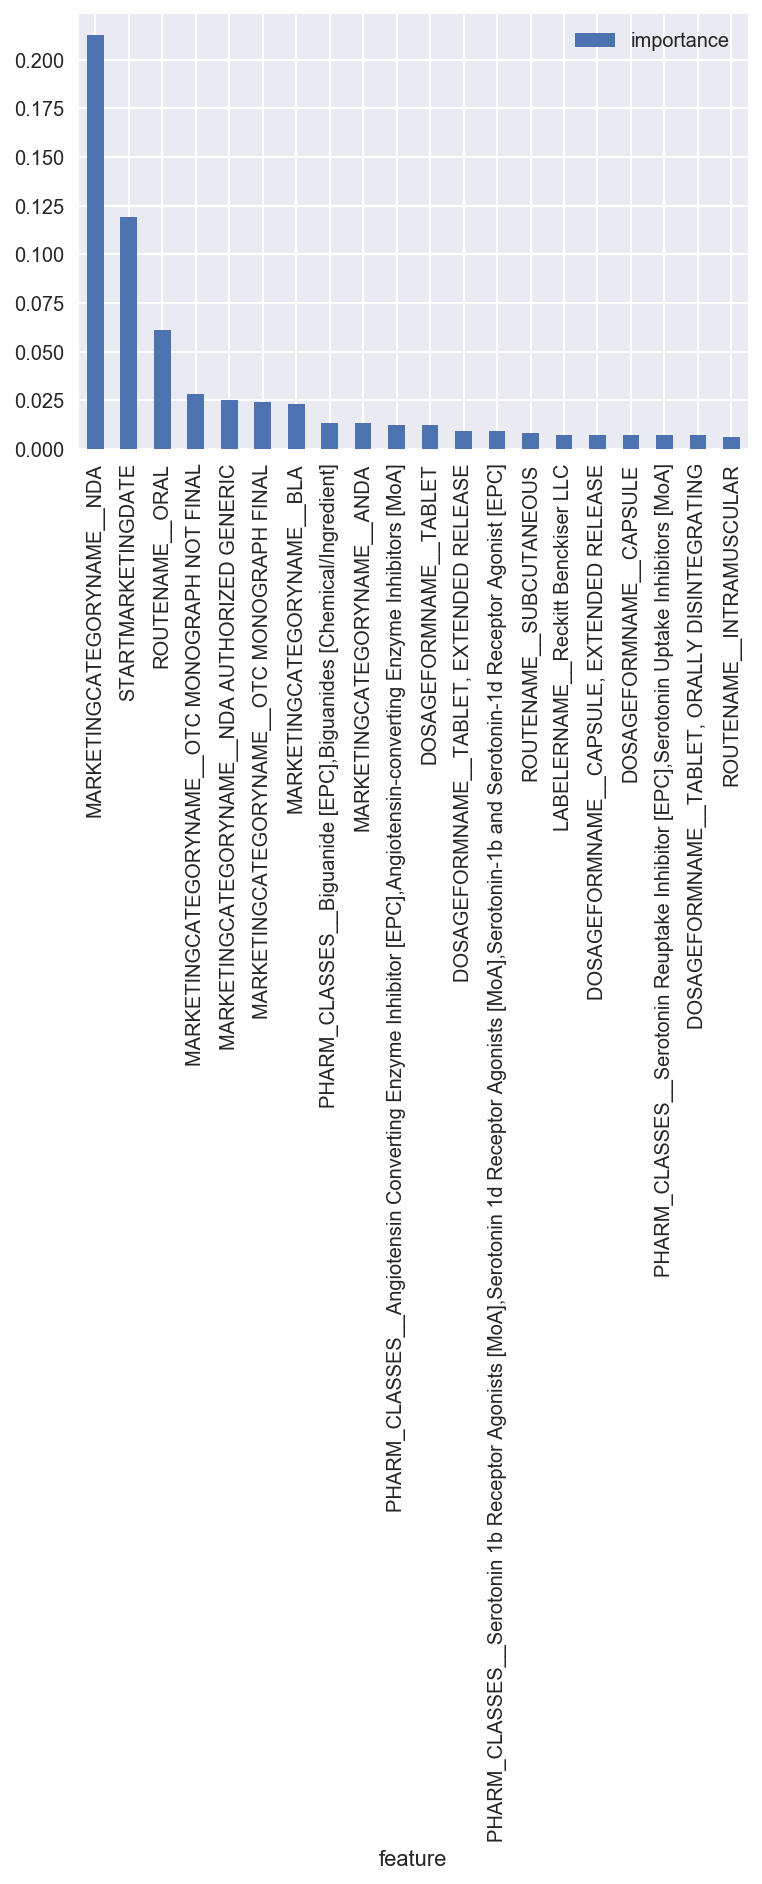

In [66]:
# random forest features importance
rf_importance = regressor.feature_importances_

#show to plot importances
rf_importancesDF = pd.DataFrame({'feature':x.columns,'importance':np.round(rf_importance,3)})
rf_importancesDF = rf_importancesDF.sort_values('importance',ascending=False).set_index('feature')
rf_importancesDF.head(20).plot.bar()

# XGBoost =====================================================
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
# get the selected features
keyfeatures=(['DOSAGEFORMNAME','ROUTENAME','LABELERNAME','STARTMARKETINGDATE','MARKETINGCATEGORYNAME',
            'PHARM_CLASSES','DEASCHEDULE','OTC','Classification_for_Rate_Setting','log_price'])
drug= drugDF.loc[:,keyfeatures]


In [76]:
y =df["logprice"]
x = df.ix[:, df.columns != 'logprice']

/Users/chrislian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [67]:
import os
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [68]:
df=drug.loc[:,['DOSAGEFORMNAME']+['ROUTENAME'] +['LABELERNAME']+ ['STARTMARKETINGDATE']  + ['PHARM_CLASSES'] + ['MARKETINGCATEGORYNAME']+['DEASCHEDULE']+['logprice']]

In [77]:
# encoding categorical variables to factors
label_encoder = dict()

for feature in (df.select_dtypes(include=['object']).columns):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(x[feature])
    x.loc[:, feature] = label_encoder[feature].transform(x[feature])


encoding feature: DOSAGEFORMNAME


LabelEncoder()

encoding feature: ROUTENAME


/Users/chrislian/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/chrislian/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


LabelEncoder()

encoding feature: LABELERNAME


/Users/chrislian/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


LabelEncoder()

encoding feature: PHARM_CLASSES


LabelEncoder()

encoding feature: MARKETINGCATEGORYNAME


LabelEncoder()

encoding feature: DEASCHEDULE


LabelEncoder()

In [78]:
x.shape

(13102, 7)

In [79]:
# 0.2 test size

X_train,X_test,y_train,y_test = ms.train_test_split(x,y,test_size=0.2,random_state=42)
X_test.shape
X_train.shape

(2621, 7)

(10481, 7)

In [80]:
X_test.head()

,DOSAGEFORMNAME,ROUTENAME,LABELERNAME,STARTMARKETINGDATE,PHARM_CLASSES,MARKETINGCATEGORYNAME,DEASCHEDULE
4347,65,23,318,20030811.0,0,5,0
7733,31,8,252,19590810.0,218,2,0
3545,71,23,500,20141101.0,364,0,0
1237,65,23,12,20170410.0,84,0,0
720,71,23,290,19990301.0,0,0,0


In [81]:
# 0.2 of train size for val data 
size_=int(0.2*len(X_train))
size_

2096

In [82]:
X_train_sub, Y_train_sub = X_train[:-size_],  y_train[:-size_]
X_val, Y_val = X_train[-size_:],  y_train[-size_:]

# check no. of rows and columsn
X_train_sub.shape
Y_train_sub.shape
X_val.shape
Y_val.shape

(8385, 7)

(8385,)

(2096, 7)

(2096,)

In [83]:
model_features=x.columns
model_features

Index([u'DOSAGEFORMNAME', u'ROUTENAME', u'LABELERNAME', u'STARTMARKETINGDATE',
       u'PHARM_CLASSES', u'MARKETINGCATEGORYNAME', u'DEASCHEDULE'],
      dtype='object')

In [84]:
dtrain = xgb.DMatrix(X_train, 
                    y_train,feature_names=model_features)


dtest = xgb.DMatrix(X_test,feature_names=model_features)

dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=model_features)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=model_features)

In [94]:
xgb_params = {
    'eta': 0.02,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
#    'lambda': 1.5, # l2 reg
    'eval_metric': 'rmse',
    
    'objective': 'reg:linear',
    'silent': 0
}

model = xgb.cv(xgb_params,
               dtrain=dtrain, 
               num_boost_round=3000,
                      nfold=5,
                      early_stopping_rounds=20,
                              verbose_eval=50)

# without log best round : [300] train-rmse:39.3578+11.0549 	test-rmse:118.303+47.7028
# with log best round: [2950]	train-rmse:0.540092+0.00351475	test-rmse:0.793734+0.0133054

[0]	train-rmse:2.58452+0.00515097	test-rmse:2.58473+0.0204683
[50]	train-rmse:1.65556+0.00264478	test-rmse:1.66764+0.0279966
[100]	train-rmse:1.38874+0.00490695	test-rmse:1.4111+0.0285836
[150]	train-rmse:1.2779+0.00528285	test-rmse:1.30972+0.0269038
[200]	train-rmse:1.21472+0.00604335	test-rmse:1.25459+0.024801
[250]	train-rmse:1.16761+0.00526257	test-rmse:1.2146+0.0254106
[300]	train-rmse:1.13218+0.00585481	test-rmse:1.18524+0.0251137
[350]	train-rmse:1.10154+0.00512978	test-rmse:1.15993+0.0240647
[400]	train-rmse:1.07458+0.00607077	test-rmse:1.13831+0.023187
[450]	train-rmse:1.05073+0.00377559	test-rmse:1.11861+0.0236292
[500]	train-rmse:1.03042+0.00395568	test-rmse:1.10239+0.0231699
[550]	train-rmse:1.00991+0.00339804	test-rmse:1.08666+0.0225696
[600]	train-rmse:0.990936+0.0037425	test-rmse:1.07203+0.0225449
[650]	train-rmse:0.973629+0.00385392	test-rmse:1.0584+0.0216829
[700]	train-rmse:0.957143+0.00488877	test-rmse:1.04525+0.020409
[750]	train-rmse:0.942564+0.00420111	test-rmse:1

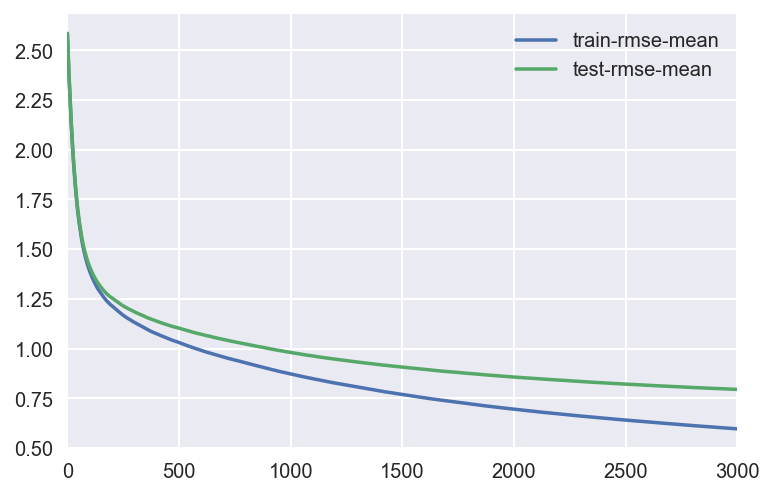

In [95]:
model[['train-rmse-mean', 'test-rmse-mean']].plot()

In [96]:
best_boost_rounds = len(model)
best_model = xgb.train(dict(xgb_params, silent=0), 
                       dtrain, num_boost_round= best_boost_rounds)

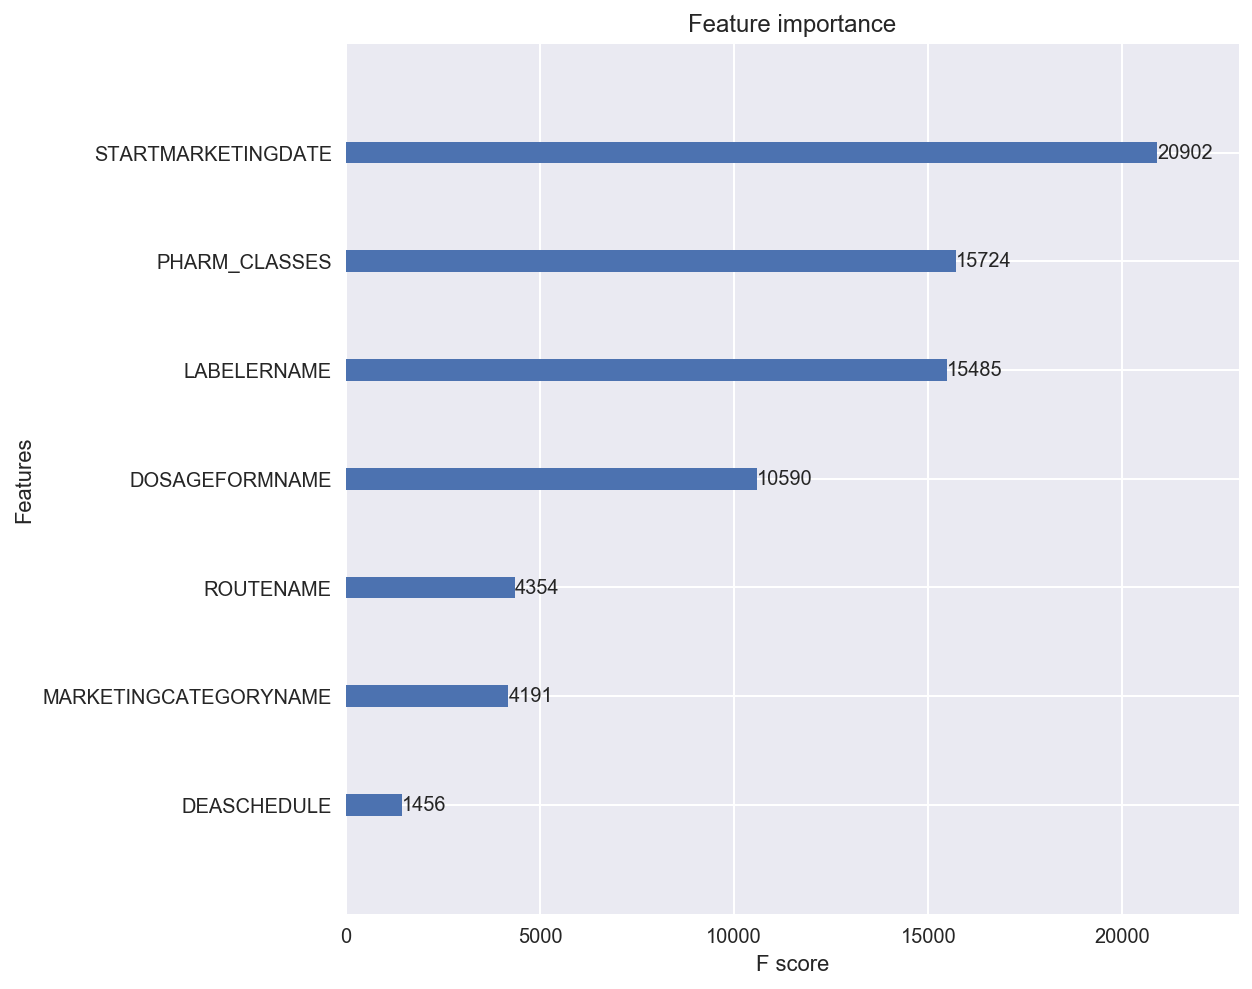

In [97]:
# plot feature importance 
fig, ax = plt.subplots(figsize=(8, 8))
xgb.plot_importance(best_model,ax=ax)
plt.rcParams.update({'font.size': 10})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
plt.rc('figure', titlesize=10)  # fontsize of the figure title

In [98]:
# feature importance in table form
pd.DataFrame(best_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)


,feature,importance
1,STARTMARKETINGDATE,20902
6,PHARM_CLASSES,15724
3,LABELERNAME,15485
2,DOSAGEFORMNAME,10590
4,ROUTENAME,4354
5,MARKETINGCATEGORYNAME,4191
0,DEASCHEDULE,1456


In [89]:
xgb_pred = best_model.predict(dtest)
errorScore=np.sqrt(((xgb_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# Without log -Root Mean Squared error: 401.96
# With Log- Root Mean Squared error: 0.75

Root Mean Squared error: 0.79


In [93]:
#check whole model

dtrain = xgb.DMatrix(x, 
                    y,feature_names=model_features)


dtest = xgb.DMatrix(X_test,feature_names=model_features)

dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=model_features)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=model_features)

In [102]:
xgb_pred = best_model.predict(dtrain)
errorScore=np.sqrt(((xgb_pred - y) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)

Root Mean Squared error: 0.61


In [103]:
xgb_pred = best_model.predict(dtest)
errorScore=np.sqrt(((xgb_pred - y_test) ** 2).mean())
print("Root Mean Squared error: %.2f"
      % errorScore)
# Without log -Root Mean Squared error: 401.96
# With Log- Root Mean Squared error: 0.75

Root Mean Squared error: 0.61
